1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

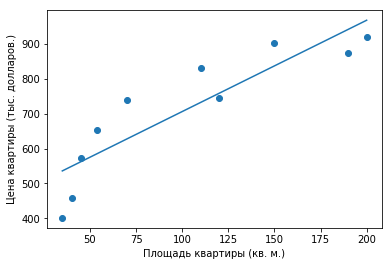

444.1773573243596 2.620538882402765


In [28]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# количество наблюдений
n = 10
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
x = np.array(zp, dtype=np.float64)
y = np.array(ks, dtype=np.float64)

b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)

r = b * np.std(x) / np.std(y)
R2 = r**2
y_pred = a + b * x
y_pred1 = b * x
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
F_fact = (r**2 * (n - 2)) / (1 - r**2)

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Площадь квартиры (кв. м.)')
plt.ylabel('Цена квартиры (тыс. долларов.)')
plt.show()
print(a,b)

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [29]:
# формируем наборы обучающих данных
x_train, y_train = x, y

# скорость обучения
lr = 0.05
# количество эпох
n_epochs = 100

# основной цикл
for epoch in range(n_epochs):
  
    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки 
    yhat = a + b * x_train
    
    # 1. определяем лосс
    # считаем отклонение нового результата от обучающего:
    error = (y_train - yhat)
    
    # 2. считаем градиенты (вспоминая формулу производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()
    
    # 3. обновляем параметры, используя коэффициент скорости обучения
    a = a - lr * a_grad
    b = b - lr * b_grad
a,b

(-2.013421903365287e+296, -2.735463263026013e+298)

3.В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Лаплас - построение доверительных интервалов или проверка гипотез о параметрах случайных величин.
Стьюдент -  значение для произвольного количества степеней свободы и для любого уровня значимости.